In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## (0) Importing Libraries

In [ ]:
import pandas as pd

import plotly.express as px
from matplotlib import pyplot as plt
import gzip
import networkx as nx

from collections import defaultdict , Counter


### Load the data 

In [ ]:
content = open('/content/drive/MyDrive/2 Sem/IR/CSE508_Winter2023_A3_98/p2p-Gnutella05.txt', 'r')
Lines = content.readlines()
print(Lines)

['# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella05.txt \n', '# Directed Gnutella P2P network from August 5 2002\n', '# Nodes: 8846 Edges: 31839\n', '# FromNodeId\tToNodeId\n', '0\t1\n', '0\t2\n', '0\t3\n', '0\t4\n', '0\t5\n', '0\t6\n', '0\t7\n', '0\t8\n', '0\t9\n', '0\t10\n', '1\t310\n', '1\t1091\n', '1\t1213\n', '1\t1517\n', '1\t3082\n', '1\t3084\n', '1\t3326\n', '1\t3327\n', '1\t3328\n', '1\t3329\n', '3\t3472\n', '4\t3094\n', '5\t269\n', '5\t761\n', '5\t1465\n', '5\t2648\n', '5\t2649\n', '5\t3151\n', '5\t3460\n', '6\t1066\n', '6\t1247\n', '6\t1815\n', '6\t1978\n', '6\t2251\n', '6\t2252\n', '6\t2256\n', '6\t2257\n', '6\t3324\n', '6\t3325\n', '9\t10\n', '9\t1009\n', '9\t1576\n', '9\t1914\n', '9\t3259\n', '9\t3330\n', '9\t3331\n', '9\t3332\n', '9\t3333\n', '10\t731\n', '10\t748\n', '10\t807\n', '10\t808\n', '10\t809\n', '10\t810\n', '10\t811\n', '10\t812\n', '10\t813\n', '10\t814\n', '11\t12\n', '11\t13\n', '11\t14\n', '11\t15\n', '11\t16\n', '11\t17\n', '11

In [ ]:

Lines=Lines[4:]
len(Lines)

31839

In [ ]:
Lines[0]

'0\t1\n'

### Extract list of edges and nodes from the .txt content

In [ ]:
list_of_edges = []
list_of_nodes = set()
# Strips the newline character
for line in Lines:
    list_of_edges.append(tuple(map(int , line.strip().split())))
    list_of_nodes.add(list_of_edges[-1][0])
    list_of_nodes.add(list_of_edges[-1][1])

In [ ]:
print(len(list_of_edges))
print(len(list_of_nodes))

31839
8846


In [ ]:
print('Total number of edges in the graph: ',len(list_of_edges))

Total number of edges in the graph:  31839


In [ ]:
# Create set of unique list_of_nodes

list_of_nodes = set(list_of_nodes)
print('Total number of list_of_nodes in the graph: ',len(list_of_nodes))

Total number of list_of_nodes in the graph:  8846


###Creating nx graph object

In [ ]:
G = nx.DiGraph()
for i in list_of_edges:
    G.add_edge(i[0] , i[1])

In [ ]:
graph={}
graphin={}

for i in list_of_nodes:
  graph[i]=set()
  graphin[i]=set()

for j in list_of_edges:
    graph[j[0]].add(j[1])
    graphin[j[1]].add(j[0])

In [ ]:
len(graph)

8846

In [ ]:
graph

{0: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 1: {310, 1091, 1213, 1517, 3082, 3084, 3326, 3327, 3328, 3329},
 2: set(),
 3: {3472},
 4: {3094},
 5: {269, 761, 1465, 2648, 2649, 3151, 3460},
 6: {1066, 1247, 1815, 1978, 2251, 2252, 2256, 2257, 3324, 3325},
 7: set(),
 8: set(),
 9: {10, 1009, 1576, 1914, 3259, 3330, 3331, 3332, 3333},
 10: {731, 748, 807, 808, 809, 810, 811, 812, 813, 814},
 11: {12, 13, 14, 15, 16, 17, 18, 19, 20, 21},
 12: {708, 1276, 1482, 1590, 1632, 2885, 3334, 3335, 3336, 3337},
 13: {460, 765, 766, 767, 768, 769, 770, 771, 772, 773},
 14: {218, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372},
 15: set(),
 16: set(),
 17: set(),
 18: set(),
 19: {296, 3618},
 20: set(),
 21: {1344, 1655, 1798, 2626, 2877, 3338, 3339, 3340, 3341, 3342},
 22: {23, 24, 25, 26, 27, 28, 29, 30, 31},
 23: {31, 730, 1240, 2239, 2305, 2654, 2826, 3348, 3349, 3350},
 24: set(),
 25: set(),
 26: set(),
 27: set(),
 28: {295, 1676, 2243, 2400, 2546, 3343, 3344, 3345, 3346, 3347},
 29: set(),


#(1) Represent the network in terms of its ‘adjacency matrix’.

In [ ]:
adjacency_matrix = [[0] * len(graph) for i in range(len(graph))] # adjacency matrix
# print(adjacency_matrix)
for i in graph:
    # print(i)
    # print(graph[i])
    
    for j in graph[i]:
        adjacency_matrix[i][j] = 1
df = pd.DataFrame(adjacency_matrix)
print('Adjacency matrix')
df

Adjacency matrix


,0,1,2,3,4,5,6,7,8,9,...,8836,8837,8838,8839,8840,8841,8842,8843,8844,8845
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Edge list

In [ ]:
print("list_of_edges" , list_of_edges) # list_of_edges
print("Length of list_of_edges" , len(list_of_edges) , len(set(list_of_edges)))

list_of_edges [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 310), (1, 1091), (1, 1213), (1, 1517), (1, 3082), (1, 3084), (1, 3326), (1, 3327), (1, 3328), (1, 3329), (3, 3472), (4, 3094), (5, 269), (5, 761), (5, 1465), (5, 2648), (5, 2649), (5, 3151), (5, 3460), (6, 1066), (6, 1247), (6, 1815), (6, 1978), (6, 2251), (6, 2252), (6, 2256), (6, 2257), (6, 3324), (6, 3325), (9, 10), (9, 1009), (9, 1576), (9, 1914), (9, 3259), (9, 3330), (9, 3331), (9, 3332), (9, 3333), (10, 731), (10, 748), (10, 807), (10, 808), (10, 809), (10, 810), (10, 811), (10, 812), (10, 813), (10, 814), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (11, 19), (11, 20), (11, 21), (12, 708), (12, 1276), (12, 1482), (12, 1590), (12, 1632), (12, 2885), (12, 3334), (12, 3335), (12, 3336), (12, 3337), (13, 460), (13, 765), (13, 766), (13, 767), (13, 768), (13, 769), (13, 770), (13, 771), (13, 772), (13, 773), (14, 218), (14, 1364), (14, 1365), (14, 1366), (14, 

#(2) Describe the dataset chosen and report the following:

##1. Number of list_of_nodes

In [ ]:
print("Number of list_of_nodes:", len(adjacency_matrix))

Number of list_of_nodes: 8846


##2. Number of Edges

In [ ]:
print("Number of Edges:", len(list_of_edges))

Number of Edges: 31839


##3. Avg. In-Degree

In [ ]:
node_with_max_outdegree = (0 ,0)
node_with_max_indegree = (0 ,0)

In [ ]:
average_in_degree = 0 
for i in graphin:
    average_in_degree+=len(graphin[i])
    if len(graphin[i]) > node_with_max_indegree[1]:
        node_with_max_indegree = (i , len(graphin[i]))
print("Average in degree " , average_in_degree / len(adjacency_matrix))

Average in degree  3.5992539000678274


##4. Avg Out-degree

In [ ]:
average_out_degree = 0
for i in graph:
    average_out_degree+=len(graph[i])
    if len(graph[i]) > node_with_max_outdegree[1]:
        node_with_max_outdegree = (i , len(graph[i]))
    
print("Average out-degree " , average_out_degree / len(adjacency_matrix))

Average out-degree  3.5992539000678274


Avg **In-Degree** & **Out-Degree** are same for a dircted graph.

##5. Node with Max In-degree

In [ ]:
print("Node with Max In-degree:",node_with_max_indegree[0])
print("Node with Max In-degree:",node_with_max_indegree[1])

Node with Max In-degree: 842
Node with Max In-degree: 79


##6. Node with Max out-degree

In [ ]:
print("Node with Max out-degree:",node_with_max_outdegree[0])
print("Max out-degree:",node_with_max_outdegree[1])

Node with Max out-degree: 3002
Max out-degree: 65


##7. The density of the network

In [ ]:
maximum_edges = len(graph) * len(graph)
print("The density of the network:" , len(list_of_edges) / maximum_edges)

The density of the network: 0.00040687925616864426


Hence it is a very sparse graph.

#Plot degree distribution of the network

##Plot in-degree

In [ ]:
indegree_distribution = Counter()
for i in graphin:
    indegree_distribution[len(graphin[i])] += 1

toplot = {"Degree":sorted(list(indegree_distribution.keys())) , "Frequency":[ indegree_distribution[i] for i in sorted(indegree_distribution.keys())]}
fig = px.line(toplot , x = "Degree" , y = "Frequency" , title= "IN DEGREE DISTRIBUTION")
fig.show()

In [ ]:
def display(dicts):
    for i,j in dicts.items():
      print(f'{i} : {j}')
      print()

display(indegree_distribution)

3 : 1122

8 : 206

1 : 3019

4 : 832

7 : 309

2 : 1597

19 : 13

6 : 422

9 : 137

12 : 62

16 : 22

65 : 4

20 : 8

10 : 102

5 : 616

55 : 1

13 : 35

11 : 80

0 : 118

14 : 33

28 : 3

15 : 27

17 : 12

64 : 2

73 : 3

69 : 2

46 : 2

66 : 3

74 : 1

68 : 1

63 : 2

58 : 2

57 : 1

59 : 2

67 : 2

18 : 8

56 : 2

77 : 1

51 : 1

47 : 2

39 : 2

22 : 4

24 : 1

30 : 3

21 : 4

45 : 2

79 : 1

25 : 1

49 : 1

75 : 1

23 : 4

33 : 1

44 : 2

31 : 1

76 : 1



##Plot out-degree

In [ ]:
outdegree_distribution = Counter()
for i in graph:
    outdegree_distribution[len(graph[i])] += 1

toplot = {"Degree":sorted(list(outdegree_distribution.keys())) , "Frequency":[ outdegree_distribution[i] for i in sorted(outdegree_distribution.keys())]}
fig = px.line(toplot , x = "Degree" , y = "Frequency" , title= "OUT DEGREE DISTRIBUTION")
fig.show()

In [ ]:
def display(dicts):
    for i,j in dicts.items():
      print(f'{i} : {j}')
      print()

display(outdegree_distribution)


10 : 2413

0 : 4996

1 : 546

7 : 12

9 : 496

2 : 47

3 : 33

5 : 160

11 : 4

4 : 29

8 : 63

12 : 6

13 : 4

6 : 9

15 : 1

22 : 1

21 : 3

23 : 2

65 : 1

14 : 1

48 : 1

18 : 1

29 : 2

38 : 1

24 : 2

34 : 1

28 : 2

19 : 2

54 : 1

32 : 1

40 : 1

17 : 1

16 : 1

25 : 1

33 : 1



#Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution of the network.

In [ ]:
clustering_coefficient = []
for i in graph:
    t = 0 
    for j in graph[i]:
        for k in graph[j]:
            if k in graph[i] :
                t += 1 
    len_ = len(graph[i])
    if len_ < 2:
        clustering_coefficient.append(0)
    else:
        t >>= 1 
        clustering_coefficient.append(t / ((len_ * (len_-1)  ) ))

In [ ]:
for i in range(len(graph)):
    print("The local clustering coefficient Node "+ str(i)+"'s  is" , clustering_coefficient[i])

Streaming output truncated to the last 5000 lines.
The local clustering coefficient Node 3846's  is 0
The local clustering coefficient Node 3847's  is 0.0
The local clustering coefficient Node 3848's  is 0
The local clustering coefficient Node 3849's  is 0
The local clustering coefficient Node 3850's  is 0
The local clustering coefficient Node 3851's  is 0
The local clustering coefficient Node 3852's  is 0
The local clustering coefficient Node 3853's  is 0
The local clustering coefficient Node 3854's  is 0.0
The local clustering coefficient Node 3855's  is 0
The local clustering coefficient Node 3856's  is 0
The local clustering coefficient Node 3857's  is 0
The local clustering coefficient Node 3858's  is 0.0
The local clustering coefficient Node 3859's  is 0
The local clustering coefficient Node 3860's  is 0.0
The local clustering coefficient Node 3861's  is 0
The local clustering coefficient Node 3862's  is 0
The local clustering coefficient Node 3863's  is 0
The local clustering co

##Histogram plot for Clustering coeff. distribution

Text(0.5, 0, 'Local Clustering Coefficient')

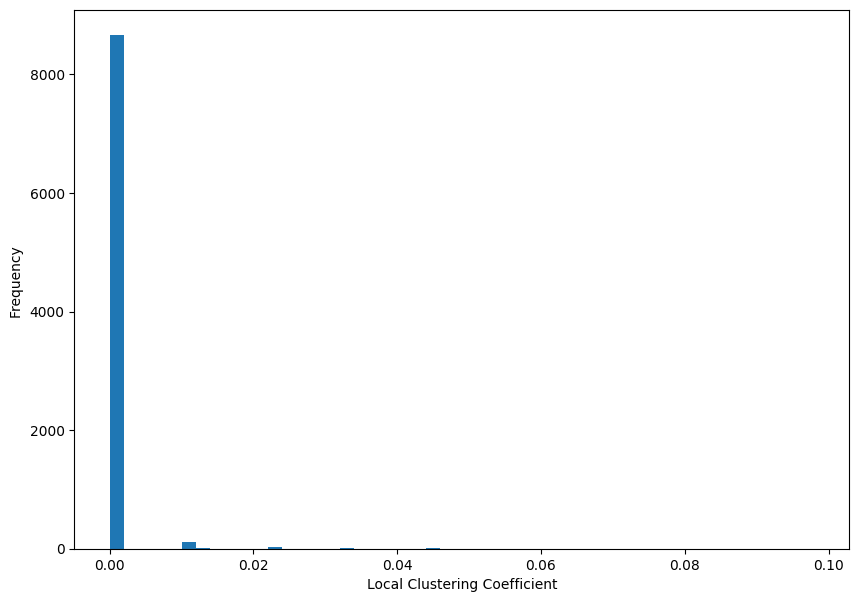

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(clustering_coefficient , bins = [0.002 * i for i in range(50)])
plt.ylabel("Frequency ")
plt.xlabel("Local Clustering Coefficient")

##Line plot for Clustering coeff. distribution

In [ ]:
clustering_coefficient_d =  Counter(clustering_coefficient)
toplot = {"Local Clustering Co-efficient":sorted(list(clustering_coefficient_d.keys())) , "Frequency":[ clustering_coefficient_d[i] for i in sorted(clustering_coefficient_d.keys())]}
fig = px.line(toplot , x = "Local Clustering Co-efficient" , y = "Frequency" , title= "Clustering Coefficient Distribution")
fig.show()